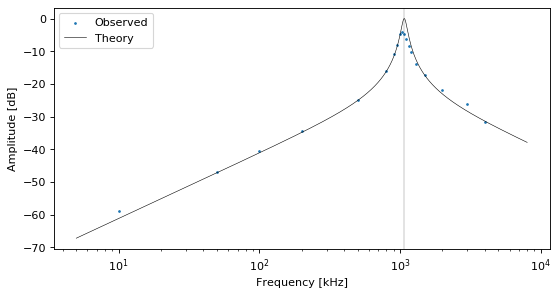

In [15]:
import cmath
import numpy
import matplotlib.pyplot as plt
import numpy as np

C = 467.4 * 10**(-12)
L = 47.3 * 10**(-6)
R = 29.85

def Y(om):
    return 1/((1/(1j*om*C))+1j*om*L+R)

# c_Re = c.real
# c_Im = c.imag
# c_abs = cmath.polar(c)[0]
# c_ph = cmath.polar(c)[1]

plt.figure(figsize=(8, 4), dpi=80)

om_list = [10, 50, 100, 200, 500,  800, 900, 950, 1000, 1030, 1070, 1100, 1150, 1200, 1300, 1500, 2000, 3000, 4000]
ampratio = [0.001122807,0.004429825,0.009454545,0.019107143,0.056428571,0.159615385,0.283146067,0.389473684,0.578947368,0.62962963,0.589285714,0.495238095,0.383783784,0.304878049,0.202020202,0.135849057,0.08,0.049122807,0.026315789,]

freq_list = [i/10 for i in range (50, 80000)]
y_list = [Y(2000*np.pi*i) for i in freq_list]

#for i in range (0, len(om_list)):
#    print(str(om_list[i])+"\t"+str(cmath.polar(y_list[i])[0])+"\t"+str(cmath.polar(y_list[i])[1]))
    
th = plt.plot(freq_list,[np.log10(cmath.polar(i)[0]*R)*20 for i in y_list], c="black",linewidth = 0.5)
ob = plt.scatter(om_list,np.log10(ampratio)*20,s=2)
plt.xscale("log")
plt.ylabel("Amplitude [dB]")
plt.xlabel("Frequency [kHz]")
plt.axvline(1070,ymin=0,ymax=1,linewidth = 0.2, c = "black")
plt.legend([ob,th[0]],("Observed","Theory"), loc ="upper left")
plt.savefig("figures/series_resonant_RLC_amp.png")
plt.show()

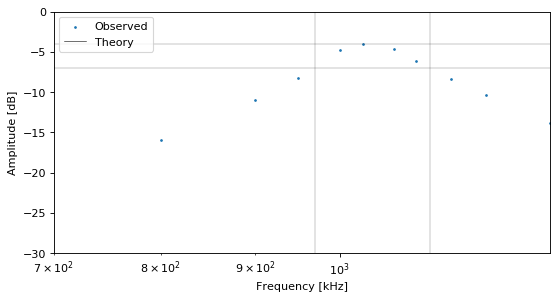

In [9]:
plt.figure(figsize=(8, 4), dpi=80)
#th = plt.plot(freq_list,[np.log10(cmath.polar(i)[0]*R)*20 for i in y_list], c="black",linewidth = 0.5)
ob = plt.scatter(om_list,np.log10(ampratio)*20,s=2)
plt.xscale("log")
plt.ylabel("Amplitude [dB]")
plt.xlabel("Frequency [kHz]")
plt.axvline(970,ymin=0,ymax=1,linewidth = 0.2, c = "black")
plt.axvline(1120,ymin=0,ymax=1,linewidth = 0.2, c = "black")
plt.axhline(-4,xmin=0,xmax=1,linewidth = 0.2, c = "black")
plt.axhline(-7,xmin=0,xmax=1,linewidth = 0.2, c = "black")
plt.legend([ob,th[0]],("Observed","Theory"), loc ="upper left")
plt.savefig("figures/series_resonant_RLC_amp.png")
plt.xlim(700,1300)
plt.ylim(-30,0)
plt.show()

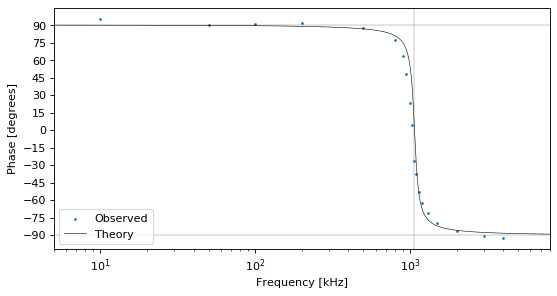

In [10]:
plt.figure(figsize=(8, 4), dpi=80)
phase_list = [95.04,90,90.72,92.16,87.84,77.184,63.504,47.88,23.04,4.4496,-26.1936,-38.016,-52.992,-62.208,-71.136,-79.92,-86.4,-90.72,-92.16]
th = plt.plot(freq_list,[cmath.polar(i)[1]*360/(2*np.pi) for i in y_list],c="black",linewidth = 0.5)
ob = plt.scatter(om_list,phase_list,s=2)
plt.xscale("log")
plt.xlim(5,8000)
plt.ylabel("Phase [degrees]")
plt.xlabel("Frequency [kHz]")
plt.savefig("figures/series_resonant_RLC_phase.png")
plt.yticks(np.linspace(-90, 90, 13))
plt.axhline(90,xmin=0,xmax=1,c='black',linewidth=0.2)
plt.axhline(-90,xmin=0,xmax=1,c='black',linewidth=0.2)
plt.axvline(1070,ymin=0,ymax=1,linewidth = 0.2, c = "black")
plt.legend([ob,th[0]],("Observed","Theory"), loc ="lower left")
plt.savefig("figures/series_resonant_RLC_phase.png")

-0.8574147871244338


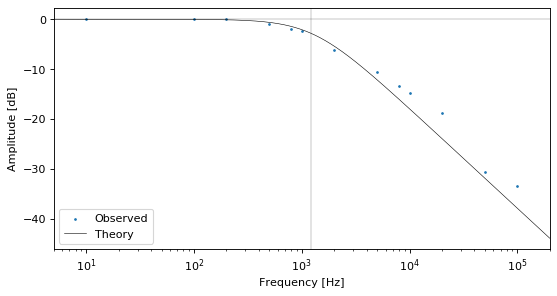

In [11]:
plt.figure(figsize=(8, 4), dpi=80)

C = 124.9*(10**-9)
R = 998

def H(om):
    return 1/(1+1j*om*R*C)

freq_list = [i for i in range (5, 200000)]
h_list = [H(2*np.pi*i) for i in freq_list]

om_list = [10,100,200,500,800,1000,2000,5000,8000,10000,20000,50000,100000]
amp_1 = [1.26,1.26,1.26,1.25,1.24,1.24,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22]
amp_2 = [1.26,1.26,1.26,1.12,1.00,0.94,0.6,0.36,0.26,0.22,0.14,0.036,0.026]
phase = [0,5.76,8.64,25.2,40.32,43.2,57.6,75.6,83.52,83.52,86.4,90,89.28]
ampratio = [amp_2[i]/amp_1[i] for i in range (0, len(om_list))]

slope, intercept = np.polyfit(np.log10(om_list[6:]), np.log10(ampratio[6:]), 1)
print(slope)

#理論値傾き
#slope, intercept = np.polyfit(np.log10(freq_list[1000:]), [np.log10(cmath.polar(i)[0]) for i in h_list][1000:], 1)
#print(slope)

plt.plot([i for i in freq_list],[np.log10(cmath.polar(i)[0])*20 for i in h_list], c="black",linewidth = 0.5)
plt.axhline(0,xmin=0,xmax=1,c='black',linewidth=0.2)
plt.scatter(om_list,[np.log10(i)*20 for i in ampratio],s=2)
plt.xscale("log")
plt.xlim(5,200000)
plt.ylabel("Amplitude [dB]")
plt.xlabel("Frequency [Hz]")
plt.legend([ob,th[0]],("Observed","Theory"), loc ="lower left")
plt.axvline(1213,ymin=0,ymax=1,c='black',linewidth = 0.2)
plt.savefig("figures/four_terminal_RC_amp.png")

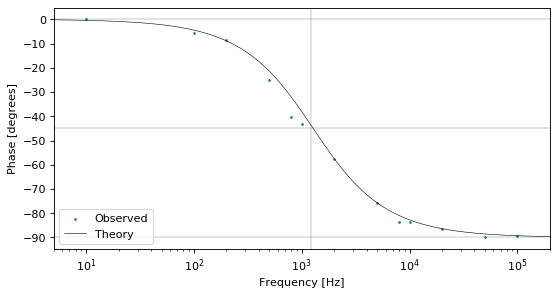

In [14]:
plt.figure(figsize=(8, 4), dpi=80)
th = plt.plot(freq_list,[cmath.polar(i)[1]*360/(2*np.pi) for i in h_list], c="black",linewidth = 0.5)
ob = plt.scatter(om_list,[-phase[i]  for i in range (0, len(phase))],s=2)

plt.xscale("log")
#plt.ylim(-100,10)
plt.xlim(5,200000)
plt.yticks(np.linspace(-90, 0, 10))
plt.ylabel("Phase [degrees]")
plt.xlabel("Frequency [Hz]")
plt.axhline(0,xmin=0,xmax=1,c='black',linewidth=0.2)
plt.axhline(-90,xmin=0,xmax=1,c='black',linewidth=0.2)
plt.axhline(-45,xmin=0,xmax=1,c='black',linewidth=0.2)
plt.legend([ob,th[0]],("Observed","Theory"), loc ="lower left")
plt.axvline(1213,ymin=0,ymax=1,c='black',linewidth = 0.2)
plt.savefig("figures/four_terminal_RC_phase.png")